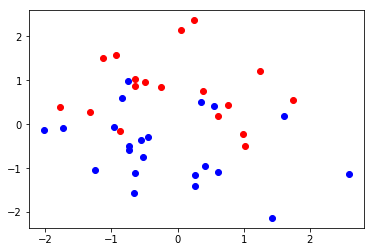

In [25]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import time

# definition of constant values
n = 40
lam = 1

# create dataset
omega = np.random.randn(1)
noise = 0.8 * np.random.randn(n)
x = np.random.randn(n, 2)
y = np.where(omega * x[:, 0] + x[:, 1] + noise > 0, 1, -1)

# plot dataset
def plot_dataset(show=True, axes=plt):
    for data, label in zip(x,y):
        color= 'b' if label < 0 else 'r'
        axes.plot(data[0], data[1], color+'o')
    if show: plt.show()
        
plot_dataset()

In [26]:
# declation of variables
w1 = Symbol('w1')
w2 = Symbol('w2')
w = np.array([w1, w2])

# define J(w)
j = sum([log(exp(tmp) + 1) for tmp in -y * np.sum(w * x, axis=1)]) + lam * sum(w * w) 
    

# batch steepest gradient method
def gradient_method(epoch=10, lr=0.2):
    grad = diff(j, w)
    omega = np.ones_like(w)
    js = []
    t = time.time()
    for step in range(epoch + 1):
        js.append(j.subs([(w1, omega[0]), (w2, omega[1])]))
        print('{:02d} step:\tJ={}\tw={}'.format(step, js[step], omega))
        omega = omega - lr * grad.subs([(w1, omega[0]), (w2, omega[1])])
    print("Finish training in {} s.".format(time.time() - t))
        
    fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
    # plot J_t
    axL.plot(np.arange(epoch+1), np.array(js))
    # plot datasets and draw boundary
    axR.set_ylim([x[:, 1].min() - 1, x[:, 1].max() + 1])
    v1 = np.linspace(x[:, 0].min(), x[:, 0].max(), 100)
    v2 = - omega[0] / omega[1] * v1
    axR.plot(v1, v2, 'g-')
    plot_dataset(False, axes=axR)
    
    
# Newton based method
def newton_method(epoch=10):
    t= time.time()
    omega = np.ones_like(w)
    d1, d2 = Symbol('d1'), Symbol('d2')
    d = np.array([d1, d2])
    js = []
    for step in range(epoch + 1):
        js.append(j.subs([(w1, omega[0]), (w2, omega[1])]))
        print('{:02d} step:\tJ={}\tw={}'.format(step, js[step], omega))
        grad = diff(j, w).subs([(w1, omega[0]), (w2, omega[1])])
        hesian = np.array(diff(j, w, 2).subs([(w1, omega[0]), (w2, omega[1])])).reshape(2, 2)
        omega  += np.array(list(solve(np.dot(hesian, d) + grad).values()))
    print("Finish training in {} s.".format(time.time() - t))
        
    fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
    # plot J_t
    axL.plot(np.arange(epoch+1), np.array(js))
    # plot datasets and draw boundary
    axR.set_ylim([x[:, 1].min() - 1, x[:, 1].max() + 1])
    v1 = np.linspace(x[:, 0].min(), x[:, 0].max(), 100)
    v2 = - omega[0] / omega[1] * v1
    axR.plot(v1, v2, 'g-')
    plot_dataset(False, axes=axR)

00 step:	J=23.2453729445084	w=[1 1]
01 step:	J=23.8365096358004	w=[-0.563441928356649 1.82391379490981]
02 step:	J=22.5671562735805	w=[1.02686721616998 1.30314485461700]
03 step:	J=22.5971298752333	w=[-0.448585725205515 1.65518426642401]
04 step:	J=22.1642119235826	w=[0.966993753960229 1.28912160960875]
05 step:	J=22.3151036215000	w=[-0.412741254258555 1.63628924484696]
06 step:	J=21.9943869038716	w=[0.941325500846781 1.28652063121603]
07 step:	J=22.1793829929512	w=[-0.394948276899796 1.62666275731421]
08 step:	J=21.9092578774638	w=[0.928212742897405 1.28548924246255]
09 step:	J=22.1088204233380	w=[-0.385512409971011 1.62163139627199]
10 step:	J=21.8638606109446	w=[0.921145310774588 1.28500578638699]
Finish training in 2.5661561489105225 s.


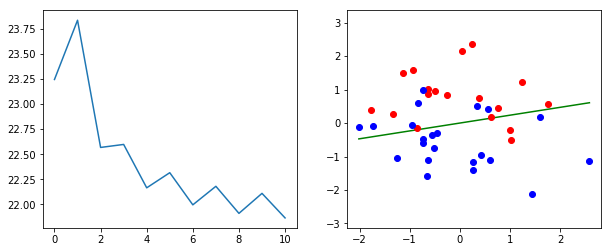

In [27]:
# run the batch steepest gradient method and show the result.
gradient_method()

00 step:	J=23.2453729445084	w=[1 1]
01 step:	J=19.7310163798204	w=[0.162155719950178 1.26305048318354]
02 step:	J=19.6415867741546	w=[0.271065275753455 1.36326895662452]
03 step:	J=19.6415103188482	w=[0.273435884925124 1.36744718076499]
04 step:	J=19.6415103187476	w=[0.273437929296102 1.36745241014167]
05 step:	J=19.6415103187476	w=[0.273437929298157 1.36745241014950]
06 step:	J=19.6415103187476	w=[0.273437929298157 1.36745241014950]
07 step:	J=19.6415103187476	w=[0.273437929298157 1.36745241014950]
08 step:	J=19.6415103187476	w=[0.273437929298157 1.36745241014950]
09 step:	J=19.6415103187476	w=[0.273437929298157 1.36745241014950]
10 step:	J=19.6415103187476	w=[0.273437929298157 1.36745241014950]
Finish training in 24.95006513595581 s.


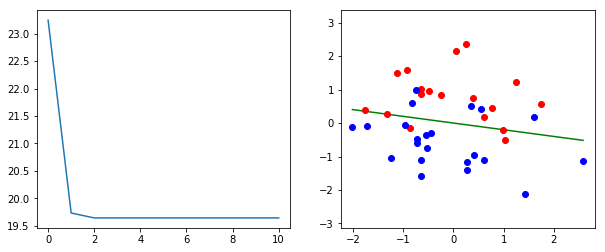

In [28]:
# run the Newton based method and show the result.
newton_method()